In [ ]:
# For displaying plots inline in Jupyter Notebooks (Jupyter/Colab only)
%matplotlib inline

# Core libraries
import os  # Used for interacting with the operating system (e.g., file handling)

# NumPy for numerical operations and linear algebra
import numpy as np  # Core numerical operations
from numpy import random  # Random number generation
from numpy.linalg import inv  # Matrix inversion

# Pandas for data manipulation and analysis
import pandas as pd

# SciPy for scientific and statistical computing
import scipy  # Core SciPy functionality
from scipy import stats as sts  # Statistical tools and distributions
from scipy.stats import (
    skew,               # Measure of asymmetry in data
    kurtosis,           # Measure of tailedness in data
    binom,              # Binomial distribution
    poisson,            # Poisson distribution
    expon,              # Exponential distribution
    norm,               # Normal distribution
    t,                  # Student's t-distribution
    chisquare,          # Chi-square test
    chi2,               # to convert test-statistic value to p-value
    chi2_contingency,   #
    f
)
import scipy.cluster.hierarchy as sch

# Collections module for specialized container datatypes
from collections import Counter  # Count frequency of elements in a list or array

# Matplotlib for basic data visualization
import matplotlib
from matplotlib import pyplot as plt  # Plotting interface similar to MATLAB

# Seaborn for statistical data visualization (built on top of matplotlib)
import seaborn as sns

# Pylab for legacy plotting support (not recommended for modern use)
from pylab import legend  # For adding legends to plots

# Statsmodels for advanced statistical modeling and inference
import statsmodels.api as sm  # Core API for modeling
from statsmodels import stats  # Statistical tools
from statsmodels.stats import (
    weightstats as ssw,  # Weighted statistics (e.g., t-tests)
    proportion as ssp,
)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols  # Ordinary Least Squares (regression)
import statsmodels.stats.multicomp  # Multiple comparison tests
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Tukey's HSD test for pairwise comparisons
from statsmodels.stats import rates
from statsmodels.stats.rates import (
    test_poisson,
    test_poisson_2indep
)
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn, NegativeBinomial as ngb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, r2_score, roc_auc_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV  #Train test split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
import xgboost
from xgboost import XGBClassifier
# ------
import tensorflow as tf
from tensorflow.keras.models import Sequential # helps with the forward and backward propagation
from tensorflow.keras.layers import Dense # this is for the hidden, input and output layers
from tensorflow.keras.layers import ReLU # importing the ReLU function
from tensorflow.keras.layers import Dropout  # required for switching off some neurons
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from nltk.util import ngrams
import string

In [ ]:
os.chdir(r'E:/CDAC/Statistics and PML/Statistics')

In [ ]:
df = pd.read_csv('churning_clean.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,652.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,France,Female,41.0,1.0,0.00,1.0,0.0,1.0,112542.58,0.0
2,4,15701354,Boni,652.0,France,Female,37.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
3,5,15737888,Mitchell,850.0,Spain,Female,43.0,0.0,125510.82,1.0,1.0,1.0,0.00,0.0
4,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,4977,15701206,Reilly,583.0,France,Male,53.0,6.0,141004.46,2.0,0.0,0.0,143711.02,0.0
107996,6047,15695819,Tang,418.0,Spain,Female,38.0,4.0,0.00,2.0,1.0,0.0,143458.31,0.0
107997,9876,15655903,Thompson,763.0,Spain,Male,32.0,0.0,12459.19,1.0,1.0,0.0,127022.87,0.0
107998,5685,15684769,Ts'ao,688.0,France,Male,30.0,4.0,0.00,2.0,0.0,1.0,58111.71,0.0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      108000 non-null  float64
 1   Geography        108000 non-null  object 
 2   Gender           108000 non-null  object 
 3   Age              108000 non-null  float64
 4   Tenure           108000 non-null  float64
 5   Balance          108000 non-null  float64
 6   NumOfProducts    108000 non-null  float64
 7   HasCrCard        108000 non-null  float64
 8   IsActiveMember   108000 non-null  float64
 9   EstimatedSalary  108000 non-null  float64
 10  Exited           108000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 9.1+ MB


In [ ]:
cat_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
conti_cols = list(df.columns.difference(cat_cols))

In [ ]:
conti_cols, cat_cols

(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited', 'Tenure'],
 ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

In [ ]:
df.Exited.unique()

array([1., 0.])

In [ ]:
for i in cat_cols:
  print(i)
  print(np.unique(df[i]))
  print("----")

Geography
['France' 'Germany' 'Spain']
----
Gender
['Female' 'Male']
----
NumOfProducts
[1. 2. 3. 4.]
----
HasCrCard
[0. 1.]
----
IsActiveMember
[0. 1.]
----


In [ ]:
imp_cols = []

In [ ]:
for i in cat_cols:
  print("-----------------------")
  print(f"Ho: {i} has no influence on Exited")
  test_df = pd.crosstab(df[i], df.Exited)
  chi2, p, *_ = chi2_contingency(test_df)
  if p > 0.05:
   print(p)
   print('We do not reject the Null hypothesis (Ho).')
  else:
   imp_cols.append(i)
   print(p)
   print('We reject the Null-hypothesis')

-----------------------
Ho: Geography has no influence on Exited
0.09837834684190844
We do not reject the Null hypothesis (Ho).
-----------------------
Ho: Gender has no influence on Exited
0.028734871008344976
We reject the Null-hypothesis
-----------------------
Ho: NumOfProducts has no influence on Exited
3.2621082242964057e-18
We reject the Null-hypothesis
-----------------------
Ho: HasCrCard has no influence on Exited
0.2646626798515538
We do not reject the Null hypothesis (Ho).
-----------------------
Ho: IsActiveMember has no influence on Exited
0.008804512654423795
We reject the Null-hypothesis


In [ ]:
for i in conti_cols:
    print("-------------------")
    print(f"{i} has no influence on Exited")
    t, p = ssw.ztest(df[df.Exited == 1][i], df[df.Exited == 0][i], value = 0)
    print(p)
    if p > 0.05:
      print('We do not reject the null hypothesis (Ho).')
    else:
      imp_cols.append(i)
      print("We reject the null hypothesis (Ho)")

-------------------
Age has no influence on Exited
9.460778806013697e-14
We reject the null hypothesis (Ho)
-------------------
Balance has no influence on Exited
0.0026535935299679307
We reject the null hypothesis (Ho)
-------------------
CreditScore has no influence on Exited


0.07753120682952774
We do not reject the null hypothesis (Ho).
-------------------
EstimatedSalary has no influence on Exited
0.20128282210835113
We do not reject the null hypothesis (Ho).
-------------------
Exited has no influence on Exited
0.0
We reject the null hypothesis (Ho)
-------------------
Tenure has no influence on Exited
0.9380657046710206
We do not reject the null hypothesis (Ho).


D:\anaconda\Lib\site-packages\statsmodels\stats\weightstats.py:748: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = (value1 - value2 - diff) / std_diff


In [ ]:
imp_cols.remove('Exited')

In [ ]:
imp_cols

['Gender', 'NumOfProducts', 'IsActiveMember', 'Age', 'Balance']

In [ ]:
x = df[imp_cols]
y = df['Exited']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          108000 non-null  object 
 1   NumOfProducts   108000 non-null  float64
 2   IsActiveMember  108000 non-null  float64
 3   Age             108000 non-null  float64
 4   Balance         108000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.1+ MB


In [ ]:
x = pd.get_dummies(x, columns=['Gender'], drop_first=True, prefix='Gender').astype(int)
x

,NumOfProducts,IsActiveMember,Age,Balance,Gender_Male
0,1,1,42,0,0
1,1,1,41,0,0
2,2,0,37,0,0
3,1,1,43,125510,0
4,2,0,44,113755,1
...,...,...,...,...,...
107995,2,0,53,141004,1
107996,2,0,38,0,0
107997,1,0,32,12459,1
107998,2,1,30,0,1


In [ ]:
x = pd.get_dummies(x, columns=['NumOfProducts'], drop_first=True, prefix='NumOfProducts').astype(int)
x

,IsActiveMember,Age,Balance,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,42,0,0,0,0,0
1,1,41,0,0,0,0,0
2,0,37,0,0,1,0,0
3,1,43,125510,0,0,0,0
4,0,44,113755,1,1,0,0
...,...,...,...,...,...,...,...
107995,0,53,141004,1,1,0,0
107996,0,38,0,0,1,0,0
107997,0,32,12459,1,0,0,0
107998,1,30,0,1,1,0,0


In [ ]:
x = pd.get_dummies(x, columns=['IsActiveMember'], drop_first=True, prefix='IsActiveMember').astype(int)
x

,Age,Balance,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,IsActiveMember_1
0,42,0,0,0,0,0,1
1,41,0,0,0,0,0,1
2,37,0,0,1,0,0,0
3,43,125510,0,0,0,0,1
4,44,113755,1,1,0,0,0
...,...,...,...,...,...,...,...
107995,53,141004,1,1,0,0,0
107996,38,0,0,1,0,0,0
107997,32,12459,1,0,0,0,0
107998,30,0,1,1,0,0,1


In [ ]:
test_df = pd.concat([x, y], axis = 1)

In [ ]:
corr_matrix = test_df.corr()
corr_matrix

,Age,Balance,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,IsActiveMember_1,Exited
Age,1.000000,0.002083,-0.002463,-0.009197,0.006633,0.002001,0.006265,0.022659
Balance,0.002083,1.000000,-0.006536,-0.016778,0.001727,0.002999,0.003317,0.009144
Gender_Male,-0.002463,-0.006536,1.000000,-0.003252,0.001813,-0.001094,-0.003375,-0.006678
NumOfProducts_2,-0.009197,-0.016778,-0.003252,1.000000,-0.142828,-0.068557,0.001130,-0.023865
NumOfProducts_3,0.006633,0.001727,0.001813,-0.142828,1.000000,-0.011775,0.000239,0.012011
NumOfProducts_4,0.002001,0.002999,-0.001094,-0.068557,-0.011775,1.000000,0.003113,0.013150
IsActiveMember_1,0.006265,0.003317,-0.003375,0.001130,0.000239,0.003113,1.000000,-0.007994
Exited,0.022659,0.009144,-0.006678,-0.023865,0.012011,0.013150,-0.007994,1.000000


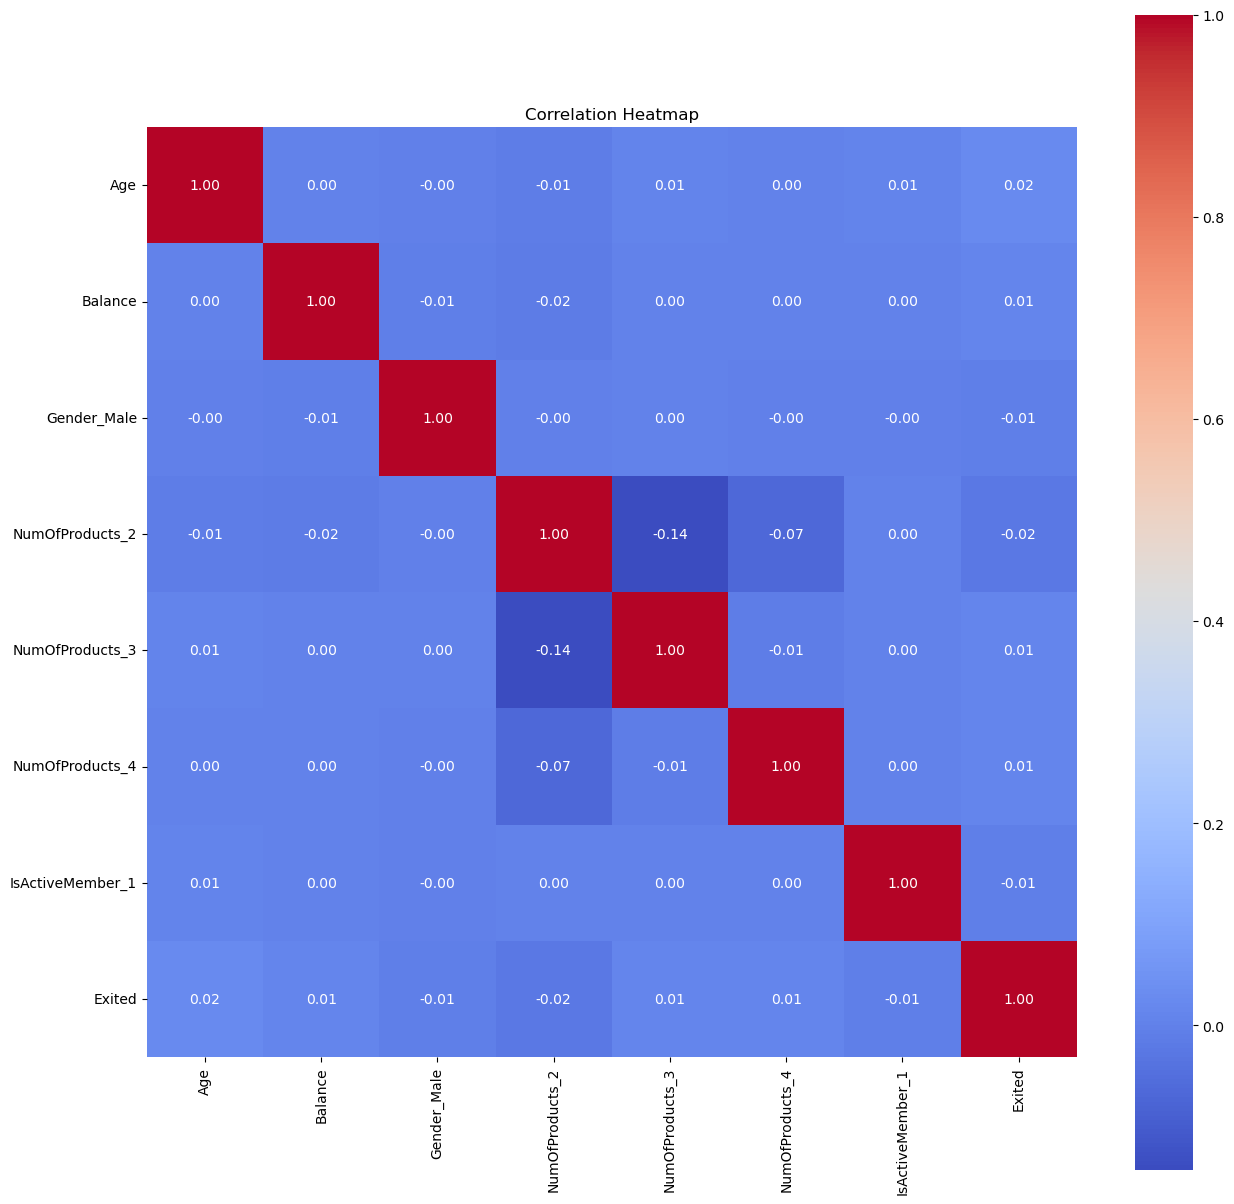

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

(86400, 7)

In [ ]:
logi_reg_model = sm.Logit(y_train, x_train).fit()
print(logi_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.514411
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                86400
Model:                          Logit   Df Residuals:                    86393
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Jun 2025   Pseudo R-squ.:                -0.01751
Time:                        19:53:18   Log-Likelihood:                -44445.
converged:                       True   LL-Null:                       -43680.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0233      0.000    -53.211      0.000      -0.024      -0.022
Balance    

In [ ]:
y_pred = logi_reg_model.predict(x_test)

In [ ]:
print(roc_auc_score(y_test, y_pred))

0.4951146041976465


In [ ]:
y_pred_class = (y_pred >= 0.5).astype(int)
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     17111
         1.0       0.00      0.00      0.00      4489

    accuracy                           0.79     21600
   macro avg       0.40      0.50      0.44     21600
weighted avg       0.63      0.79      0.70     21600



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dtc = DecisionTreeClassifier()
param = {
  'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
  'min_samples_split': [1, 2, 3, 4, 5, 6, 7],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
grd = GridSearchCV(dtc, param, cv=5, scoring='accuracy')
grd.fit(x_train, y_train)
grd.best_params_

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 5670.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

In [ ]:
y_pred = dtc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     17111
         1.0       0.00      0.00      0.00      4489

    accuracy                           0.79     21600
   macro avg       0.40      0.50      0.44     21600
weighted avg       0.63      0.79      0.70     21600



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train.values.ravel())
y_pred = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86     17155
         1.0       0.23      0.07      0.11      4445

    accuracy                           0.76     21600
   macro avg       0.51      0.50      0.48     21600
weighted avg       0.68      0.76      0.71     21600



In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load Data
data = pd.read_csv("churning_clean.csv")

# 3. Separate Features and Target
X = data.drop("Exited", axis=1)
y = data["Exited"]

# 4. Encode Categorical Features (if any)
X = pd.get_dummies(X, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Initialize and Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Predictions
y_pred = rf.predict(X_test)

# 8. Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))


In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load Data
data = pd.read_csv("churning_clean.csv")

# 3. Separate Features and Target
X = data.drop("Exited", axis=1)
y = data["Exited"]

# 4. Encode Categorical Features (if any)
X = pd.get_dummies(X, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Initialize and Train Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# 7. Predictions
y_pred = nb.predict(X_test)

# 8. Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))
